# $\color{ForestGreen}{\text{Function Optimization in Calculus}}$

## $\color{ForestGreen}{\text{Single Variable Functions}}$

In [1]:
# Import sympy library

from sympy import * 

x = symbols('x')           # Define 'x' as a symbol
f = Function('f')('x')     # Define function 'f' with variable 'x'

f = x**3 - 12*x            # Replacing the example's expression for 'f' 

f                          # Display 'f'

x**3 - 12*x

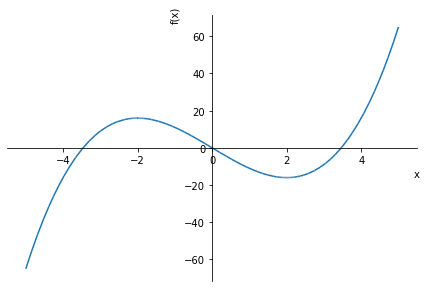

In [2]:
p1 = plot(f, (x, -5, 5), show=True)  # Plot graph of function 'f'

In [3]:
fp = f.diff(x)   # Take derivative of 'f' by 'function_name.diff(variable_name)'
fp               # Display the first derivative of 'f'

3*x**2 - 12

In [4]:
eq1 = Eq(fp, 0)     # Define an equation by 'Eq(left_side, right_side)'
sol1 = solve(eq1)   # Solve an equation by 'solve(equation_name)'

sol1                # Display the solution set 

[-2, 2]

In [5]:
fpp = f.diff(x, 2)    # Find the second derivative of 'f'

display(fpp.subs(x, sol1[0]))  # Evaluate the second derivative of 'f' at first critical point
display(fpp.subs(x, sol1[1]))  # Evaluate the second derivative of 'f' at second critical point

-12

12

In [6]:
# Define a function to decide about the nature of a given critical point of a given function

def critical_point_type(cr_pt, f, var):
    cr_pt = {var: cr_pt}
    fxx = diff(f, var, 2).subs(cr_pt)   # Evaluating second derivative at a critical point
    if fxx > 0:                         # Applying the second derivative test
        string = 'local minimum'
    elif fxx < 0:
        string = 'local maximum'
    else:
        string = 'inconclusive!'
    return string

In [7]:
# Displaying the nature of the two critical points

print('Critical point x=%s is a %s.\n' %(sol1[0], critical_point_type(sol1[0], f, x)))
print('Critical point x=%s is a %s.' %(sol1[1], critical_point_type(sol1[1], f, x)))

Critical point x=-2 is a local maximum.

Critical point x=2 is a local minimum.


## $\color{ForestGreen}{\text{Multivariable Functions}}$

In [8]:
x, y = symbols('x y')           # Define 'x' and 'y' as symbols
g = Function('g')(x, y)         # Define function 'g' with variables 'x' and 'y'

g = 3*x**2*y**2 + x**2 - 12*x*y + 2*x + 15  # Specifying the defining expresion for 'g'

display(g)                      # Display the function

3*x**2*y**2 + x**2 - 12*x*y + 2*x + 15

In [9]:
gx = diff(g, x)  # Differentiate 'g' with respect to 'x'
gy = diff(g, y)  # Differentiate 'g' with respect to 'x'

display(gx, gy)  # Display partial derivatives of 'g'

6*x*y**2 + 2*x - 12*y + 2

6*x**2*y - 12*x

In [10]:
eqs = [Eq(gx, 0), Eq(gy, 0)]   # Define two equations for the two partial derivatives
sol = solve(eqs)               # Solve the partial derivative equations to find critical points of 'g'

display(sol)                   # Display the solution set (i.e. critical points)

print('Number of critical points:', len(sol))   # Find number of critical points

[{x: -1, y: -2}, {x: 0, y: 1/6}]

Number of critical points: 2


In [11]:
# Define a function to calculate the Hessian matrix

def hessian(f, var):
    return Matrix([[simplify(diff(f, var[i], var[j])) for j in range(len(var))] for i in range(len(var))])

In [12]:
var = [x, y]            # Set of variables

hess = hessian(g, var)  # Calculate Hessian of 'g'

display(hess)           # Display Hessian matrix

Matrix([
[ 6*y**2 + 2, 12*x*y - 12],
[12*x*y - 12,      6*x**2]])

In [13]:
hess0 = hess.subs(sol[0])  # Evalute Hessian at 1st critical point
hess1 = hess.subs(sol[1])  # Evalute Hessian at 2nd critical point

display(hess0, hess1)      # Display Hessian at the two critical points

Matrix([
[26, 12],
[12,  6]])

Matrix([
[13/6, -12],
[ -12,   0]])

In [14]:
l0 = list(hess0.eigenvals().keys())   # Calculate the eigenvalues of Hessian at 1st critical point
l1 = list(hess1.eigenvals().keys())   # Calculate the eigenvalues of Hessian at 2nd critical point

print(l0, l1, '\n')                   # Show the exact eigenvalues

l0 = [l0[i].evalf(3) for i in range(len(l0))]   # Convert eigenvalues to float 
l1 = [l1[i].evalf(3) for i in range(len(l1))]   # Convert eigenvalues to float

print('Eigenvalues of Hessian at critical point %s are %s' %(sol[0], l0))   # Show the results
print('Eigenvalues of Hessian at critical point %s are %s' %(sol[1], l1))

[16 - 2*sqrt(61), 2*sqrt(61) + 16] [13/12 - sqrt(20905)/12, 13/12 + sqrt(20905)/12] 

Eigenvalues of Hessian at critical point {x: -1, y: -2} are [0.380, 31.6]
Eigenvalues of Hessian at critical point {x: 0, y: 1/6} are [-11.0, 13.1]


In [15]:
# Define a function to decide about the nature of a given critical point of a given function

def critical_point_type(cr_pt, f, var):
    hess = hessian(f, var).subs(cr_pt)   # Evalating Hessian at the critical point
    l = list(hess.eigenvals().keys())    # Finding eigenvalues of the Hessian
    count = 0                            # Setting a counter
    for k in l:
        if k>0:
            count += 1                   # Counting the number of positive eigenvalues 
    if 0 in l:                           # Applying the second derivative test (multivariable case)
        string = 'The second derivative test is inconclusive'
    else:
        if count == 0:
            string = 'local maximum'
        elif count == len(l):
            string = 'local minimum'
        else:
            string = 'saddle point'
    return string

In [16]:
# Displaying the nature of the two critical points

print('Critical point %s is a %s.\n' %(sol[0], critical_point_type(sol[0], g, var)))
print('Critical point %s is a %s.' %(sol[1], critical_point_type(sol[1], g, var)))

Critical point {x: -1, y: -2} is a local minimum.

Critical point {x: 0, y: 1/6} is a saddle point.
